# Working with MEG dataset
MEG dataset from THINGS initiative: https://openneuro.org/datasets/ds004212/versions/2.0.1
### Training data partition
The data is .fif file which needs to be converted into a rather easy to use .npy array.
We will use mne library for this: https://mne.tools/dev/index.html 


We collected extensively sampled object representations using magnetoencephalography (MEG). To this end, we drew on the THINGS database (Hebart et al., 2019), a richly-annotated database of 1,854 object concepts representative of the American English language which contains 26,107 manually-curated naturalistic object images.

ERP = event-related potential; signal with respect to some event
VEP = ERP for visual stimuli



27084 events, 281 time points, 271 channels

## Here we perform NMF experiements

In [1]:
import numpy as np
import mne, os
import matplotlib.pyplot as plt
import pandas as pd
# from tqdm import tqdm
import matplotlib.image as mpimg
# import nimfa
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [2]:
channel_picks = ['O','T','P'] 
preproc_dir = '../data/preprocessed'
image_dir = '../data/'

n_participants = 3
def load_epochs(preproc_dir,all_epochs = []):
    for p in range(1,n_participants+1):
        epochs = mne.read_epochs(f'{preproc_dir}/preprocessed_P{str(p)}-epo.fif', preload=False)
        all_epochs.append(epochs)
    return all_epochs

def plot_erfs(epochs,n_sessions,name):
    ctf_layout = mne.find_layout(epochs.info)
    picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
    picks = np.where([i[2]==name for i in ctf_layout.names])[0]

    # get evoked data
    for s in range(n_sessions):    
        evoked = epochs[(epochs.metadata['trial_type']=='test') & (epochs.metadata['session_nr']==s+1)].average()
        evoked.pick_channels(ch_names=picks_epochs)
        plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=0.5,alpha=0.4)
    evoked = epochs[(epochs.metadata['trial_type']=='test')].average()
    evoked.pick_channels(ch_names=picks_epochs)

    # plot ERFs for selected sensor group
    plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=1)
    plt.xlim([epochs.times[0]*1000,epochs.times[len(epochs.times)-1]*1000])
    plt.ylim([-0.6,0.6])
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (uV)')  
    # plt.['right'].set_visible(False)
    # plt.spines['top'].set_visible(False)

    #  plot sensor locations
    # ax2.plot(ctf_layout.pos[:,0],ctf_layout.pos[:,1],color='gainsboro',marker='.',linestyle='',markersize=5)
    # ax2.plot(ctf_layout.pos[picks,0],ctf_layout.pos[picks,1],color='grey',marker='.',linestyle='',markersize=5)
    # ax2.set_aspect('equal')


In [3]:
all_epochs = load_epochs(preproc_dir)

Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo-1.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo-2.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo-3.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

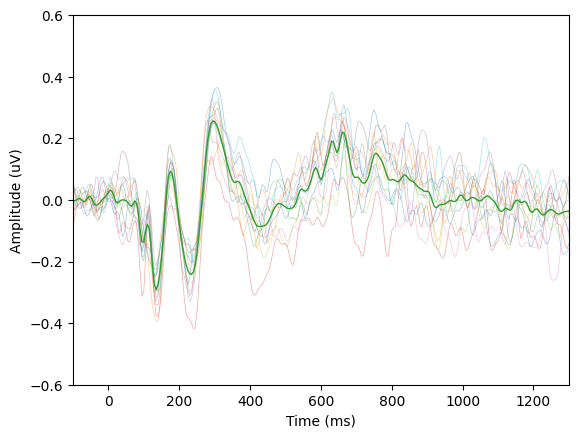

In [4]:
n_sessions = 12
plot_erfs(all_epochs[1],n_sessions,'O')

In [5]:
epochs = all_epochs[2]

In [6]:
epochs.metadata

trial_type  image_nr  category_nr  exemplar_nr  test_image_nr  \
0            exp        66            6            6            NaN   
1            exp     19722         1644            6            NaN   
2            exp      9990          833            6            NaN   
3            exp     18114         1510            6            NaN   
4            exp     21630         1803            6            NaN   
...          ...       ...          ...          ...            ...   
27043       test     22509          874           13           61.0   
27044        exp      1928          161            8            NaN   
27045        exp     12380         1032            8            NaN   
27046        exp      4736          395            8            NaN   
27047        exp     12308         1026            8            NaN   

       things_category_nr  things_image_nr  things_exemplar_nr  \
0                     6.0             77.0                 6.0   
1                  1644.0          23212.0                 6.0   
2                   833.0          11909.0                 6.0   
3                  1510.0          21355.0                 6.0   
4                  1803.0          25403.0                 6.0   
...                   ...              ...                 ...   
27043               874.0          12520.0                14.0   
27044               161.0           2461.0                 8.0   
27045              1032.0          14716.0                 8.0   
27046               395.0           5685.0                 8.0   
27047              1026.0          14624.0                 8.0   

                                         image_path   onset    image_on  \
0      images_meg/air_mattress/air_mattress_06s.jpg    3.00    3.007379   
1                      images_meg/tent/tent_06s.jpg    4.60    4.608000   
2                      images_meg/iron/iron_06s.jpg    5.90    6.158647   
3                images_meg/speaker/speaker_06s.jpg    7.55    7.559094   
4                      images_meg/weed/weed_06s.jpg    9.05    9.109738   
...                                             ...     ...         ...   
27043                images_test_meg/kimono_14s.jpg  333.25  333.271450   
27044                  images_meg/bomb/bomb_08s.jpg  334.60  334.821982   
27045                images_meg/mouth/mouth_08s.jpg  335.90  336.189182   
27046          images_meg/computer/computer_08s.jpg  337.45  337.473051   
27047      images_meg/motorcycle/motorcycle_08s.jpg  338.90  339.023669   

        image_off  responded  key_id  key_time  RT  session_nr  run_nr  
0        3.507551          0     NaN       NaN NaN           1       1  
1        5.108164          0     NaN       NaN NaN           1       1  
2        6.658820          0     NaN       NaN NaN           1       1  
3        8.059242          0     NaN       NaN NaN           1       1  
4        9.609925          0     NaN       NaN NaN           1       1  
...           ...        ...     ...       ...  ..         ...     ...  
27043  333.771659          0     NaN       NaN NaN          12      10  
27044  335.322292          0     NaN       NaN NaN          12      10  
27045  336.689494          0     NaN       NaN NaN          12      10  
27046  337.973265          0     NaN       NaN NaN          12      10  
27047  339.523893          0     NaN       NaN NaN          12      10  

[27048 rows x 18 columns]

In [7]:
name = channel_picks[0]
print(name, channel_picks)
# ctf_layout = mne.find_layout(epochs.info)
picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
ep1 = epochs[epochs.metadata['trial_type']=='exp']  
ep1.load_data() 
ep1.pick_channels(ch_names=picks_epochs); # supress output


O ['O', 'T', 'P']


Loading data for 22248 events and 281 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [8]:
NOS_CONCEPTS = 1854
NOS_IMAGE_PER_CONCEPT = 12
NOS_CHANNELS_OPT = 39
NOS_TIME_POINTS = 281
time_points = epochs.times 

In [9]:
# Initialize the concept_epochs array with zeros
concept_epochs = np.zeros((NOS_IMAGE_PER_CONCEPT, NOS_CONCEPTS, NOS_TIME_POINTS, NOS_CHANNELS_OPT))
category_nrs = ep1.metadata['category_nr'].to_numpy()
session_nrs = ep1.metadata['session_nr'].to_numpy()

# Precompute masks for categories and sessions
category_masks = [(category_nrs == (cat_nr + 1)) for cat_nr in range(NOS_CONCEPTS)]
session_masks = [(session_nrs == (img_nr + 1)) for img_nr in range(NOS_IMAGE_PER_CONCEPT)]

# Fill concept_epochs efficiently
for category_nr, category_mask in enumerate(category_masks):
    for img_nr, session_mask in enumerate(session_masks):
        mask = category_mask & session_mask
        concept_epochs[img_nr, category_nr, :, :] = ep1._data[mask].transpose(0, 2, 1)

In [10]:
# Extract all data matching the condition in one go
concept_epochs1 = np.zeros((NOS_IMAGE_PER_CONCEPT, NOS_CONCEPTS, NOS_TIME_POINTS, NOS_CHANNELS_OPT))
indices = ep1.metadata['category_nr'].values - 1  # Adjust index (assuming category_nr starts at 1)
concept_epochs1[:, indices, :, :] = ep1._data.transpose(0, 2, 1)

In [11]:
concept_epochs.shape

(12, 1854, 281, 39)

In [12]:
average_concept_epochs = concept_epochs.mean(axis = 0)
average_concept_epochs.shape

(1854, 281, 39)

In [13]:
# # z_scored_epochs = np.zeros_like(average_concept_epochs)
# for channel in range(NOS_CHANNELS_OPT):
#     mean = average_concept_epochs[:,channel,:].mean()
#     stdev = average_concept_epochs[:,channel,:].std()
#     average_concept_epochs[:,channel,:] = (average_concept_epochs[:,channel,:] - mean) / stdev

Trying NMF on a few time points


In [14]:
from sklearn.decomposition import NMF

In [15]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
# index = ep1.times == 0.170  
index = np.where(epochs.times == 0.170)[0][0]
print(index)
# X = concept_epochs[1, :, index, :].squeeze() 
X = average_concept_epochs[:, index-5 : index + 5, :].mean(axis=1).squeeze()
# X = X = average_concept_epochs[:, index, :].squeeze()
print(X.shape)
X += 15
# remove data from X less than 0 without changing the shape
X = np.maximum(X, 0)
# X = X[X > 0]
# X.shape
# plt.hist(X, bins=50)         
# plt.show()
# X.shape

54
(1854, 39)


Categories which are best on component 0 are: [ 569  142  465  875  236  764 1813  119  184  280  692  284  593 1157
  717  402 1033 1568  494  288]
Categories which are best on component 1 are: [ 791 1449 1296  236 1189  120  787 1788  506  494  404  593  717 1367
 1801  288 1699  985  402  764]
Categories which are best on component 2 are: [1039 1108  565 1730 1172  449 1554  499  501  918  684  862 1781   46
  538  209  372  569 1690  614]
Categories which are best on component 3 are: [ 203  795  409  496 1505 1126  102   42 1475  543  670 1853 1400 1373
  195  430  366 1131  445  851]
Categories which are best on component 4 are: [ 185 1589  757 1417  486  509 1174  154  993 1310  690  839 1717  798
 1096  540  935 1395 1327  769]
Categories which are best on component 5 are: [1125 1438 1658 1037 1664 1675  330 1553  567 1257  646 1327  106  809
 1284 1502  660 1659  456  341]
Component 0 is best loaded by the following image categories:


/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


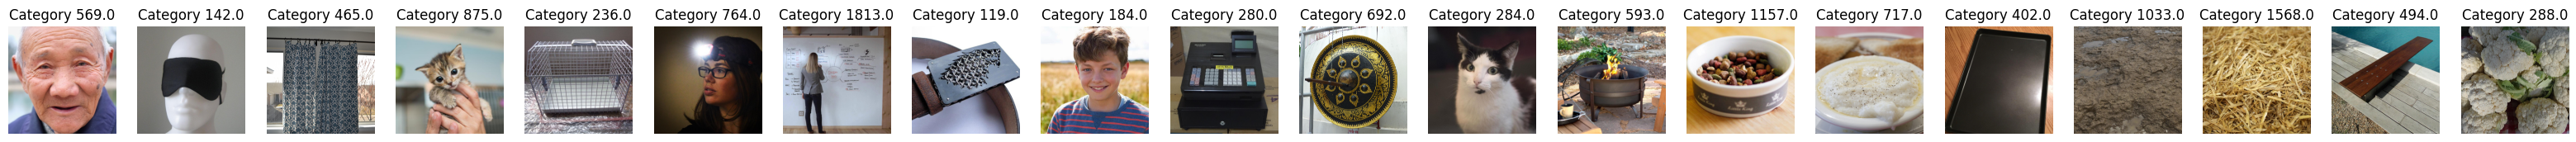

Component 1 is best loaded by the following image categories:


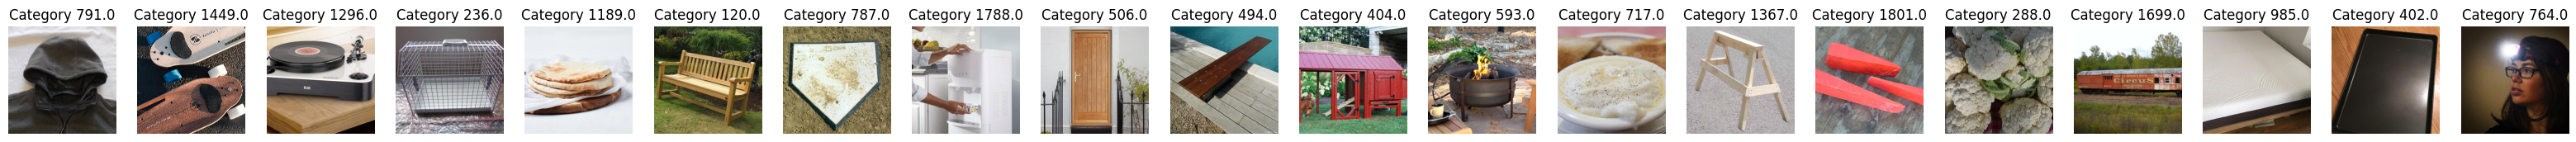

Component 2 is best loaded by the following image categories:


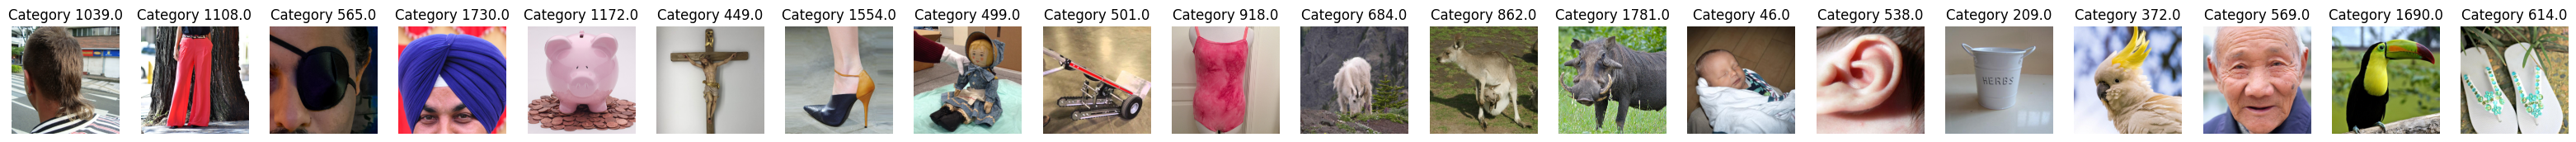

Component 3 is best loaded by the following image categories:


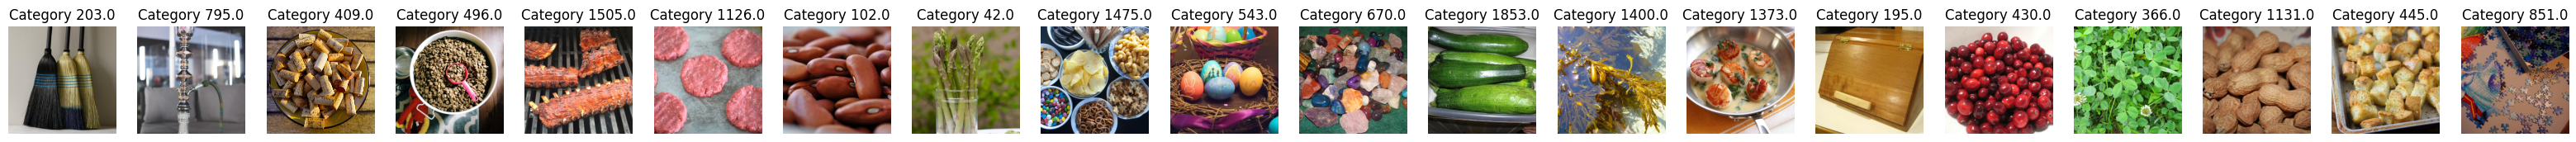

Component 4 is best loaded by the following image categories:


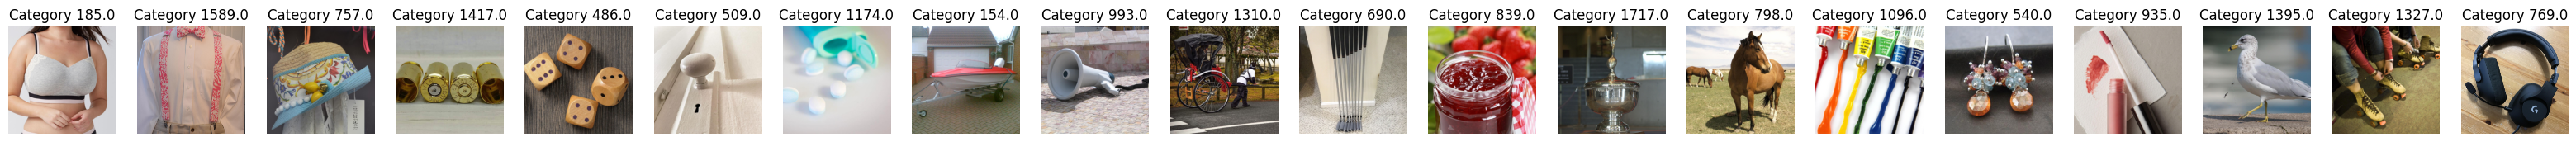

Component 5 is best loaded by the following image categories:


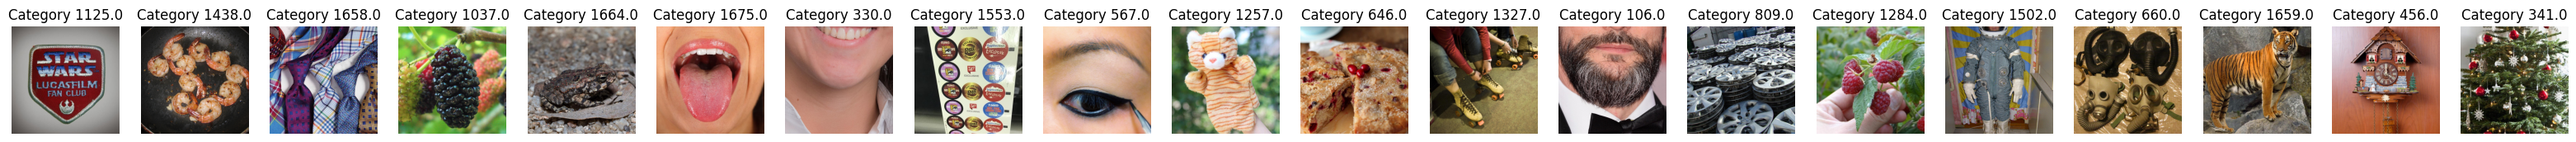

In [16]:
images_to_show = 20
nmf_components = 6
model = NMF(n_components=nmf_components, random_state=42)
model.init = 'random'   
W = model.fit_transform(X)
H = model.components_
X_pred = np.dot(W, H)
 
nmf_components_vs_category = np.zeros((nmf_components, images_to_show))
for i in range(nmf_components):
    sorted_indices = np.argsort(W[:,i])
    print(f'Categories which are best on component {i} are: {sorted_indices[-images_to_show:]}')
    nmf_components_vs_category[i,:] = sorted_indices[-images_to_show:]
# plot images for the top 5 categories for each component   
for component in range(nmf_components):
    if component > 20:
        break
    print(f"Component {component} is best loaded by the following image categories:")
    fig, axs = plt.subplots(1, images_to_show, figsize=(40, 40))
    for i in range(images_to_show):
        category_nr = nmf_components_vs_category[component, i] 
        # Get the image paths for the given category_nr
        image_paths = epochs.metadata[(epochs.metadata['category_nr'] == category_nr+1) & (epochs.metadata['trial_type'] == 'exp')]['image_path']
        image_path = image_paths.iloc[0]
        image_path = f'{image_dir}{image_path}'
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].set_title(f"Category {category_nr}")
        axs[i].axis('off')
    plt.show()

In [17]:
# similarity matrix instead of reconstructing data matrix 

In [18]:
# correlation of dimensions with the categories

In [19]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
nmf_components = 4 # 3 mins for 30 components

for time in times:
    index = epochs.times == time
    X = average_concept_epochs[:, index, :].squeeze()
    X += abs(X.min())
    model = NMF(n_components=nmf_components)
    W = model.fit_transform(X)
    H = model.components_
    X_pred = np.dot(W, H)   
    nmf_components_vs_category = np.zeros((nmf_components, 10))
    print(f'For time {time*1000} ms')
    for i in range(nmf_components):
        sorted_indices = np.argsort(W[:,i])
        # print(f'Categories which are best on component {i} are: {sorted_indices[-10:]}')
        nmf_components_vs_category[i,:] = sorted_indices[-10:]
    # plot images for the top 5 categories for each component   
    for component in range(nmf_components):
        if component > 20:
            break
        print(f"Component {component} is best loaded by the following image categories:")
        # fig, axs = plt.subplots(1, 10, figsize=(20, 20))
        for i in range(10):
            category_nr = nmf_components_vs_category[component, i] 
            # Get the image paths for the given category_nr
            image_paths = epochs.metadata[(epochs.metadata['category_nr'] == category_nr) & (epochs.metadata['trial_type'] == 'exp')]['image_path']
            print(image_paths)
            # print(image_paths.iloc[0])
            # image_path = image_paths.iloc[0]
            # image_path = f'../{image_path}'
            # img = mpimg.imread(image_path)
            # axs[i].imshow(img)
            # axs[i].set_title(f"Category {category_nr}")
            # axs[i].axis('off')
        # plt.show()

/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


For time -100.0 ms
Component 0 is best loaded by the following image categories:
939      images_meg/sickle/sickle_06s.jpg
3930     images_meg/sickle/sickle_10s.jpg
6224     images_meg/sickle/sickle_03s.jpg
6996     images_meg/sickle/sickle_04s.jpg
10061    images_meg/sickle/sickle_01b.jpg
11539    images_meg/sickle/sickle_11s.jpg
14558    images_meg/sickle/sickle_07s.jpg
16182    images_meg/sickle/sickle_09s.jpg
20232    images_meg/sickle/sickle_05s.jpg
22488    images_meg/sickle/sickle_02s.jpg
23700    images_meg/sickle/sickle_12s.jpg
27025    images_meg/sickle/sickle_08s.jpg
Name: image_path, dtype: object
968      images_meg/water_filter/water_filter_06s.jpg
3846     images_meg/water_filter/water_filter_10s.jpg
5954     images_meg/water_filter/water_filter_03s.jpg
6884     images_meg/water_filter/water_filter_04s.jpg
11104    images_meg/water_filter/water_filter_01b.jpg
12360    images_meg/water_filter/water_filter_11s.jpg
13986    images_meg/water_filter/water_filter_07s.jpg
17057

/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


508      images_meg/crown/crown_06s.jpg
3039     images_meg/crown/crown_10s.jpg
6622     images_meg/crown/crown_03s.jpg
8920     images_meg/crown/crown_04s.jpg
10997    images_meg/crown/crown_01b.jpg
12037    images_meg/crown/crown_11s.jpg
15029    images_meg/crown/crown_07s.jpg
16267    images_meg/crown/crown_09s.jpg
19587    images_meg/crown/crown_05n.jpg
22132    images_meg/crown/crown_02s.jpg
22558    images_meg/crown/crown_12s.jpg
25653    images_meg/crown/crown_08s.jpg
Name: image_path, dtype: object
1914     images_meg/oyster/oyster_06s.jpg
3787     images_meg/oyster/oyster_10s.jpg
5903     images_meg/oyster/oyster_03n.jpg
7967     images_meg/oyster/oyster_04s.jpg
11097    images_meg/oyster/oyster_01b.jpg
13467    images_meg/oyster/oyster_11n.jpg
14152    images_meg/oyster/oyster_07s.jpg
17036    images_meg/oyster/oyster_09s.jpg
19082    images_meg/oyster/oyster_05s.jpg
22521    images_meg/oyster/oyster_02n.jpg
22807    images_meg/oyster/oyster_12s.jpg
25042    images_meg/oyster